### CREDIT CARD FRAUD DETECTION

Importing the necessary libraries!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Load the data!

In [2]:
data = pd.read_csv('creditcard.csv')
data.shape

(284807, 31)

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<b>EDA</b>

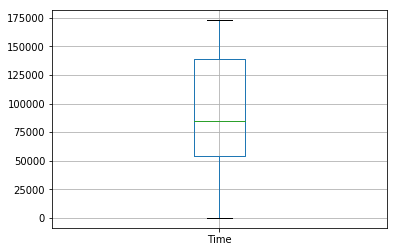

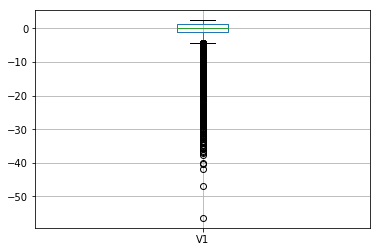

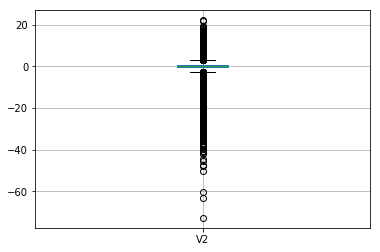

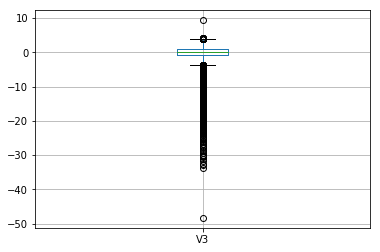

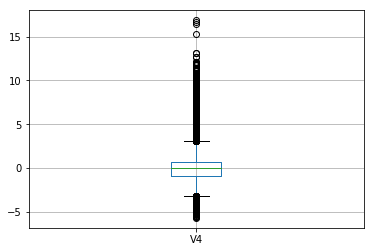

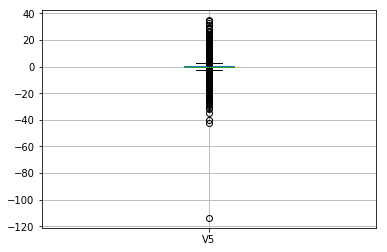

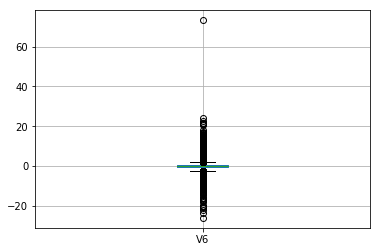

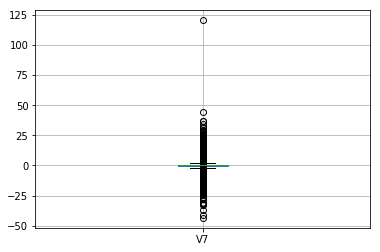

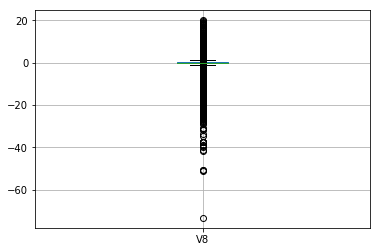

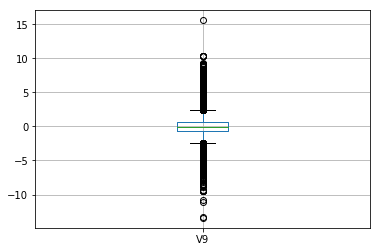

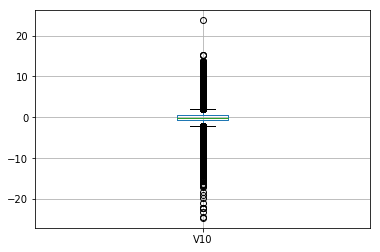

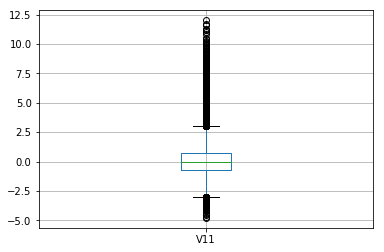

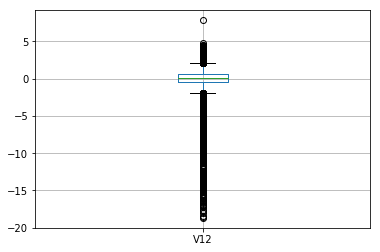

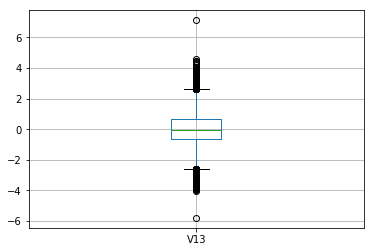

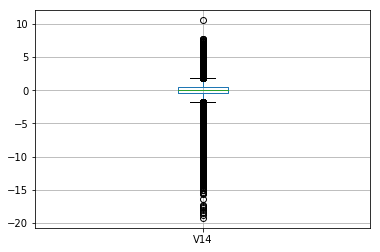

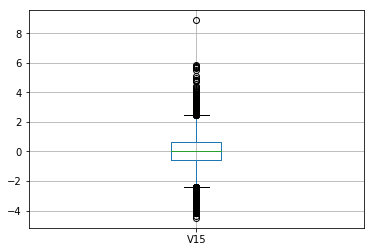

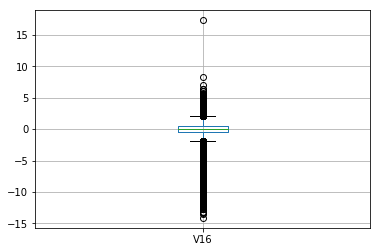

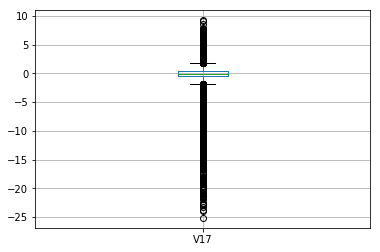

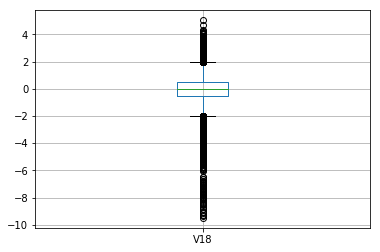

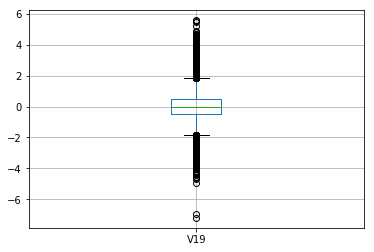

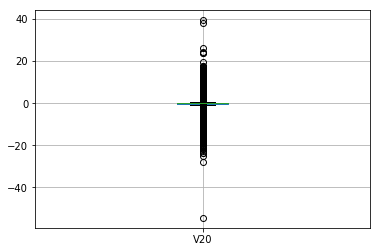

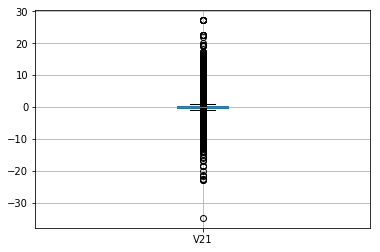

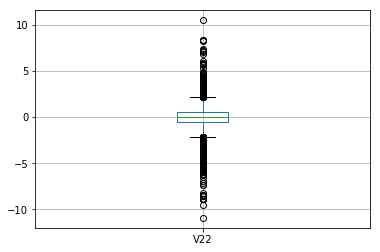

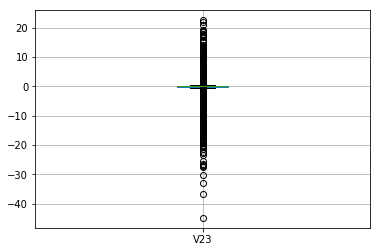

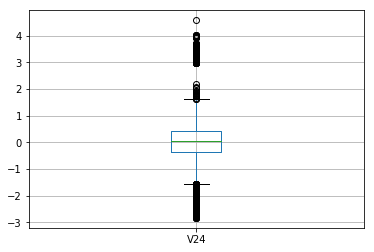

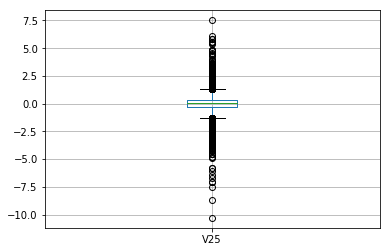

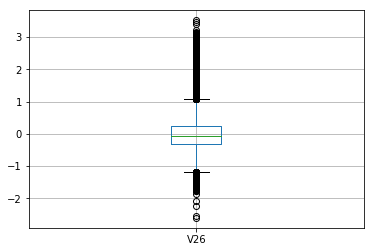

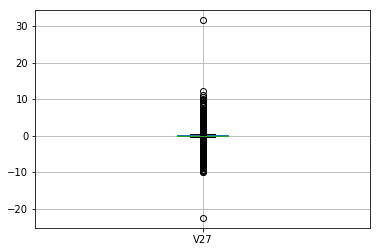

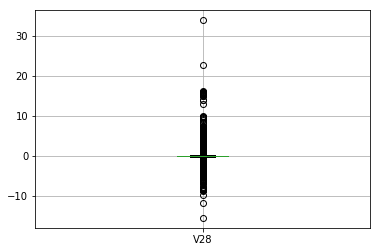

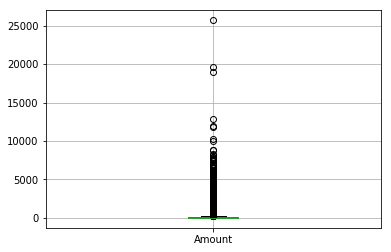

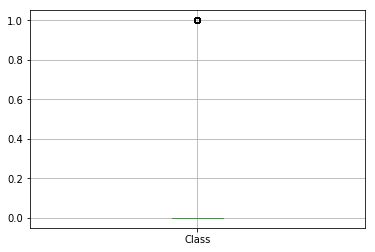

In [4]:
def box(df):
    numerical_cols = df.describe().columns.tolist()
    for i in df.loc[:,numerical_cols]:
        df.boxplot(i)
        plt.show()
        
box(data)

In [5]:
def get_summary(df):
    
    for i in df.columns[1:]:

        if (df[i].dtype == 'int64') or (df[i].dtype == 'float64'):
            print(i)
            print('Maximum :',df[i].max())
            print('Minimum :', df[i].min())
            print('Mean :',df[i].mean())
            print('Median :',df[i].median())
            print('Mode :',df[i].mode()[0])
            print('\n')

        else:
            print(df[i].value_counts())
            print('\n')
            
get_summary(data)

V1
Maximum : 2.45492999121121
Minimum : -56.407509631329
Mean : 3.919560084655042e-15
Median : 0.0181087991615309
Mode : 1.24567381944824


V2
Maximum : 22.0577289904909
Minimum : -72.7157275629303
Mean : 5.688174400270728e-16
Median : 0.0654855563960555
Mode : -0.32666777306077005


V3
Maximum : 9.38255843282114
Minimum : -48.3255893623954
Mean : -8.76907126289773e-15
Median : 0.17984634356354398
Mode : -2.75204095570008


V4
Maximum : 16.8753440335975
Minimum : -5.68317119816995
Mean : 2.782312291808533e-15
Median : -0.0198465294811989
Mode : -0.842316033286871


V5
Maximum : 34.8016658766686
Minimum : -113.74330671114599
Mean : -1.5525630329923732e-15
Median : -0.0543358267364858
Mode : -0.5627766807738629


V6
Maximum : 73.3016255459646
Minimum : -26.1605059358433
Mean : 2.010663493875542e-15
Median : -0.27418707650665103
Mode : -1.01107261632698


V7
Maximum : 120.589493945238
Minimum : -43.5572415712451
Mean : -1.694249132734738e-15
Median : 0.0401030827945351
Mode : -0.432125923

Histogram of : Time


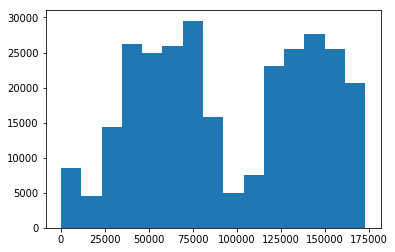

Histogram of : V1


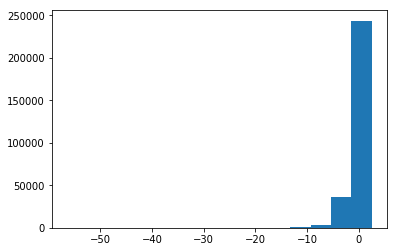

Histogram of : V2


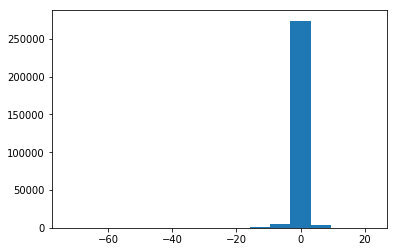

Histogram of : V3


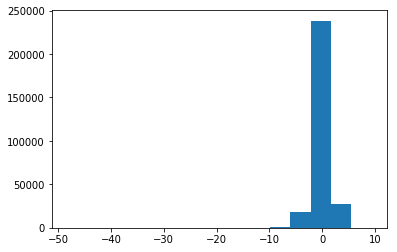

Histogram of : V4


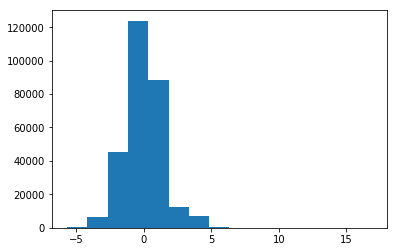

Histogram of : V5


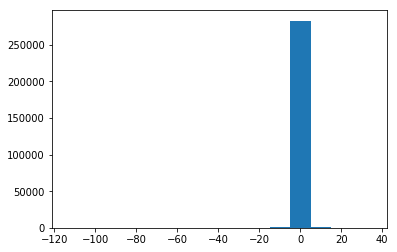

Histogram of : V6


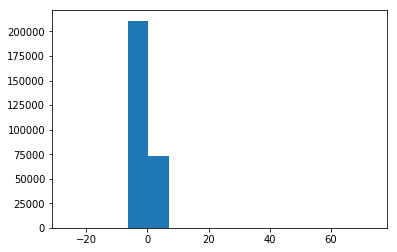

Histogram of : V7


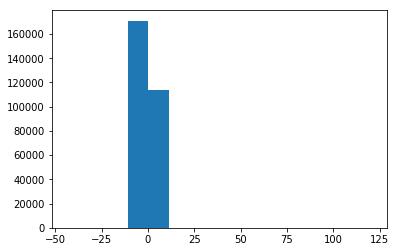

Histogram of : V8


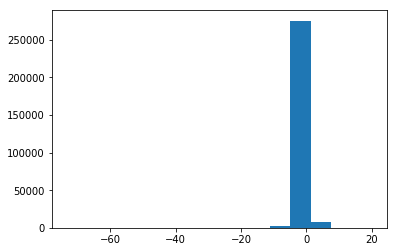

Histogram of : V9


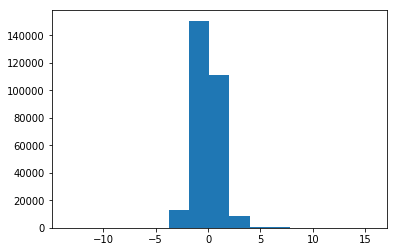

Histogram of : V10


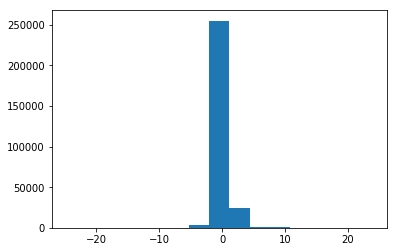

Histogram of : V11


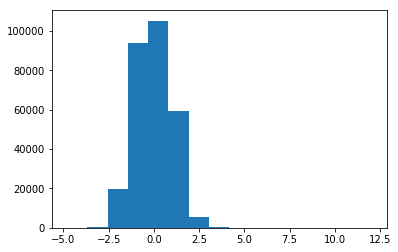

Histogram of : V12


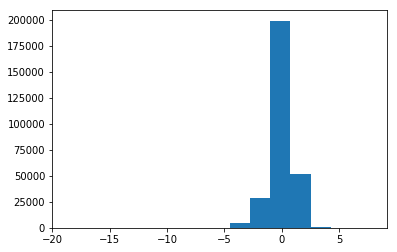

Histogram of : V13


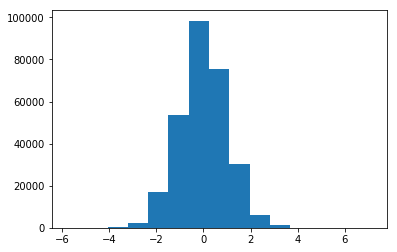

Histogram of : V14


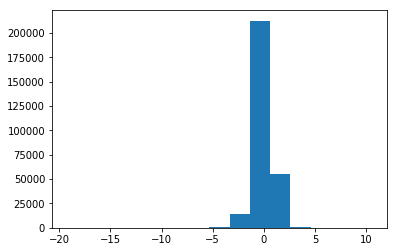

Histogram of : V15


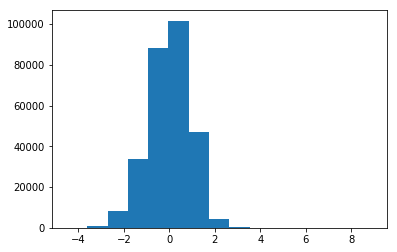

Histogram of : V16


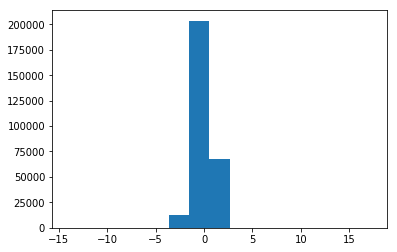

Histogram of : V17


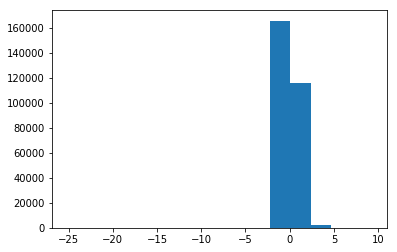

Histogram of : V18


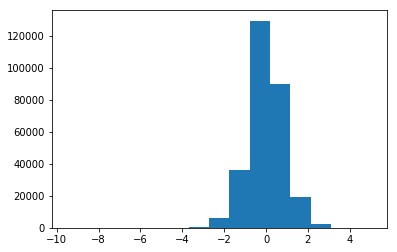

Histogram of : V19


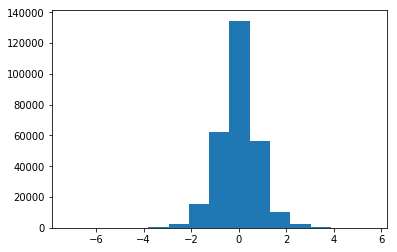

Histogram of : V20


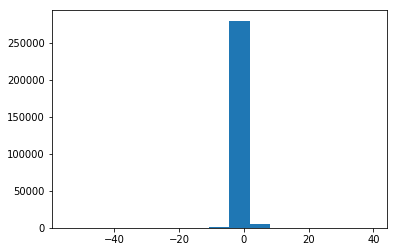

Histogram of : V21


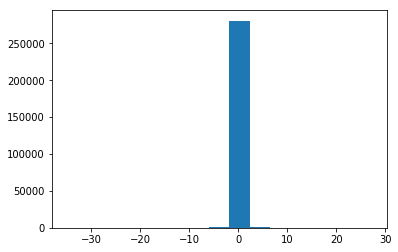

Histogram of : V22


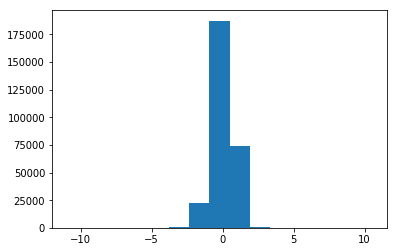

Histogram of : V23


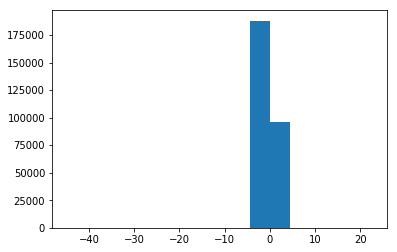

Histogram of : V24


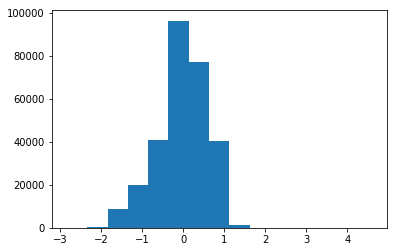

Histogram of : V25


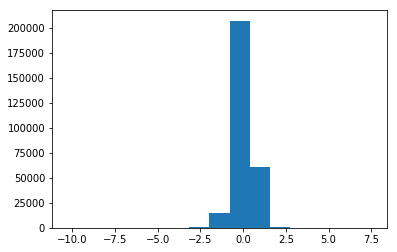

Histogram of : V26


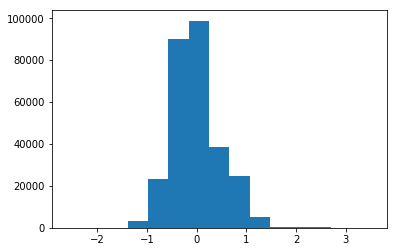

Histogram of : V27


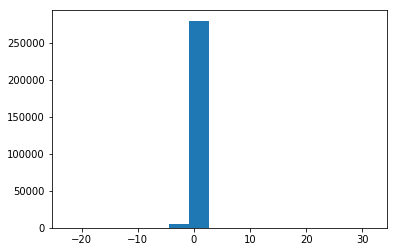

Histogram of : V28


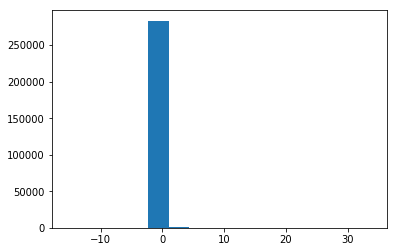

Histogram of : Amount


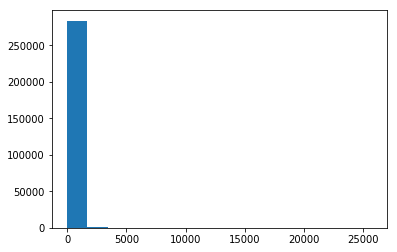

In [6]:
def plot_vars(df):
    for i in df.columns[:30]:
        if (df[i].dtype == 'int64') or (df[i].dtype == 'float64'):
            print('Histogram of :',i)
            plt.hist(df[i],bins=15)
            plt.show()
        else:
            print('Bar graph of :',i)
            plt.bar(df[i].unique().tolist(),df[i].value_counts().tolist())
            plt.show()
            
plot_vars(data)

Sum of 1 means correlation with itself (as it is the diagonal of the correlation matrix)

In [7]:
def show_unimp_vars(df,max_corr):

    dfq = df.corr()

    corr = []

    for ind,row in dfq.iterrows():
        for i in row.index.tolist():
            if ind != i and abs(row[i]) > max_corr:
                if (i,ind) in corr:
                    continue
                else:
                    corr.append((ind,i))
    
    return corr


corr_list = show_unimp_vars(data, max_corr = 0.5)

In [8]:
corr_list

[('V2', 'Amount')]

We'll work with this variable for now and check if the results are good, if not we will try dropping it!

In [9]:
data['Amount'].corr(data['V2'])

-0.5314089393280336

Checking the class imbalance

In [10]:
print('Majority class :',data['Class'].value_counts()[0]/len(data))
print('Minority class :',1 - data['Class'].value_counts()[0]/len(data))

Majority class : 0.9982725143693799
Minority class : 0.0017274856306200848


<b>Data preprocessing!</b>

In [11]:
def preprocessing_X(df):  
    
    X_ = df.copy()
    
    X_.drop(columns=['Class'],inplace=True)
    
    X_ = pd.get_dummies(X_)
    
    from sklearn.preprocessing import MinMaxScaler

    STS = MinMaxScaler()

    X_[X_.select_dtypes(['int64','float64']).columns.tolist()] = STS.fit_transform(X_[X_.select_dtypes(['int64','float64']).columns.tolist()])
    
    return X_

X = preprocessing_X(data)

In [12]:
y = data['Class']

<b>Plotting the data roughly to see its structure:</b>

The dataset seems to be very noisy!

In 2d:

In [14]:
from sklearn.decomposition import PCA

[0.0762983  0.00665884] 



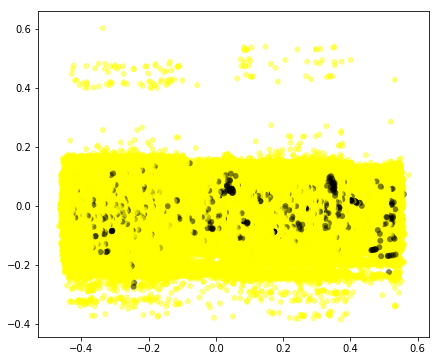

In [15]:
def pca_plot_2d_binaryclass(design_matrix,target):
    
    pca_plot = PCA(n_components=2).fit(design_matrix)
    print(pca_plot.explained_variance_,'\n')
    pcs = pca_plot.transform(design_matrix)

    label_colour = {target.unique().tolist()[0]:'yellow',target.unique().tolist()[1]:'black'}
    color_vec = [label_colour[label] for label in list(target)]

    plt.figure(figsize=(7,6))
    plt.scatter(pcs[:,0], pcs[:,1],c=color_vec, edgecolor='', alpha=0.5)
    plt.show()
    
pca_plot_2d_binaryclass(X,y)

In 3d:

[0.0762983  0.00665884 0.00619656] 



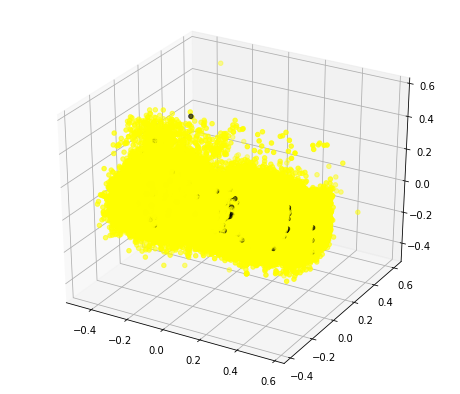

In [16]:
def pca_plot_3d_binaryclass(design_matrix,target):
    
    pca_plot = PCA(n_components=3).fit(design_matrix)
    print(pca_plot.explained_variance_,'\n')
    pcs = pca_plot.transform(design_matrix)

    label_colour = {target.unique().tolist()[0]:'yellow',target.unique().tolist()[1]:'black'}
    color_vec = [label_colour[label] for label in list(target)]

    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize=(8,7))
    ax = fig.add_subplot(111, projection='3d')
    xs = pcs[:,0] 
    ys = pcs[:,1]
    zs = pcs[:,2]
    ax.scatter(xs,ys,zs,c=color_vec, marker = 'o')
    plt.show()
    
pca_plot_3d_binaryclass(X,y)

Since the Principal components are unable to capture much variation, the data must be nonlinearly separable!

<b>Model Building:

In [17]:
def model_built(X1,y1, test_ratio):
    
    from sklearn.model_selection import train_test_split

    X_train,X_test,y_train,y_test = train_test_split(X1,y1,random_state=123,test_size=test_ratio)
      
    from sklearn.linear_model import LogisticRegression

    linreg = LogisticRegression(solver='liblinear').fit(X_train,y_train)
    
    return linreg, X_train, X_test, y_train, y_test

LR,X_train, X_test, y_train, y_test = model_built(X, y, 0.25)

In [18]:
y_lr_train = LR.predict(X_train)

y_lr_test = LR.predict(X_test)

In [19]:
def metrics(y_tn, y_pred_tn, y_ts, y_pred_ts):

    from sklearn.metrics import confusion_matrix, precision_score, recall_score
    
    tn_ts, fp_ts, fn_ts, tp_ts = confusion_matrix(y_test, y_pred_ts).ravel()
    
    tn_tn, fp_tn, fn_tn, tp_tn = confusion_matrix(y_train, y_pred_tn).ravel()
    
    print('True Positives on train:',tp_tn)
    print('True Negatives on train:',tn_tn)
    print('False Positives on train:',fp_tn)
    print('False Negatives on train:',fn_tn)
    print('\n')
    print('True Positives on test:',tp_ts)
    print('True Negatives on test:',tn_ts)
    print('False Positives on test:',fp_ts)
    print('False Negatives on test:',fn_ts)
    
    print('\n')
    print('----------------------------------------------------------')
    
    specificity_tn = tn_tn/(tn_tn + fp_tn)
    
    specificity_ts = tn_ts/(tn_ts + fp_ts)
    
    
    fpr_tn = fp_tn/(tn_tn + fp_tn)
    
    fpr_ts = fp_ts/(tn_ts + fp_ts)
    
    print('Specificity on train data :',specificity_tn)
    
    print('Specificity on test data :',specificity_ts)
    
    print('\n')
    print('---------------------------------------------------------')
    
    print('FPR on train data :',fpr_tn)
    
    print('FPR on test data :',fpr_ts)
    
    
metrics(y_train, y_lr_train, y_test, y_lr_test)

True Positives on train: 176
True Negatives on train: 213232
False Positives on train: 28
False Negatives on train: 169


True Positives on test: 75
True Negatives on test: 71045
False Positives on test: 10
False Negatives on test: 72


----------------------------------------------------------
Specificity on train data : 0.9998687048672982
Specificity on test data : 0.9998592639504609


---------------------------------------------------------
FPR on train data : 0.00013129513270186626
FPR on test data : 0.00014073604953908944


In [26]:
print(classification_report(y_train, y_lr_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213260
           1       0.86      0.51      0.64       345

   micro avg       1.00      1.00      1.00    213605
   macro avg       0.93      0.76      0.82    213605
weighted avg       1.00      1.00      1.00    213605



In [27]:
print(classification_report(y_test, y_lr_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71055
           1       0.88      0.51      0.65       147

   micro avg       1.00      1.00      1.00     71202
   macro avg       0.94      0.76      0.82     71202
weighted avg       1.00      1.00      1.00     71202



<b>If we let a Decision Tree grow a little, it can handle a little of class imbalance but it could overfit as well!</b>

In [21]:
class_weights = {1:0.9,0:0.1}

In [23]:
def DecTrees(mx_depth,cw,test_ratio,X1,y1):
    
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X1,y1,random_state=123,test_size=test_ratio) 
    
    from sklearn.tree import DecisionTreeClassifier

    Dt = DecisionTreeClassifier(max_depth = mx_depth).fit(X_train,y_train)
    
    y1_train = Dt.predict(X_train)

    y1_test = Dt.predict(X_test)
    
    return Dt, X_train, X_test, y_train, y_test,y1_train, y1_test

DT, X2_train, X2_test,y2_train, y2_test, y_dt_train, y_dt_test = DecTrees(6,class_weights,0.25,X,y)

In [24]:
metrics(y_train, y_dt_train, y_test, y_dt_test)

True Positives on train: 286
True Negatives on train: 213254
False Positives on train: 6
False Negatives on train: 59


True Positives on test: 117
True Negatives on test: 71043
False Positives on test: 12
False Negatives on test: 30


----------------------------------------------------------
Specificity on train data : 0.9999718653287067
Specificity on test data : 0.9998311167405531


---------------------------------------------------------
FPR on train data : 2.8134671293257058e-05
FPR on test data : 0.00016888325944690733


In [25]:
## For training set:

from sklearn.metrics import classification_report

print(classification_report(y_train,y_dt_train))

print('---------------------------------------------------------')

## For test set:

print(classification_report(y_test,y_dt_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213260
           1       0.98      0.83      0.90       345

   micro avg       1.00      1.00      1.00    213605
   macro avg       0.99      0.91      0.95    213605
weighted avg       1.00      1.00      1.00    213605

---------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71055
           1       0.91      0.80      0.85       147

   micro avg       1.00      1.00      1.00     71202
   macro avg       0.95      0.90      0.92     71202
weighted avg       1.00      1.00      1.00     71202



<b> Random Forest can remove the overfitting from the previous model and is also known to handle a little class imbalance, let us try test that! </b>

In [28]:
def RanFor(trees,cw,test_ratio,mx_depth,X1,y1):
    
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X1,y1,random_state=123,test_size=test_ratio) 
    
    from sklearn.ensemble import RandomForestClassifier

    Rf =RandomForestClassifier(n_estimators=trees, max_depth = mx_depth).fit(X_train,y_train)
    
    y_train = Rf.predict(X_train)

    y_test = Rf.predict(X_test)
    
    return Rf, X_train, y_train, X_test, y_test

RF, X3_train, y_rf_train, X3_test, y_rf_test = RanFor(400,class_weights,0.25,5,X,y)

In [29]:
metrics(y_train, y_rf_train, y_test, y_rf_test)

True Positives on train: 261
True Negatives on train: 213251
False Positives on train: 9
False Negatives on train: 84


True Positives on test: 103
True Negatives on test: 71049
False Positives on test: 6
False Negatives on test: 44


----------------------------------------------------------
Specificity on train data : 0.9999577979930601
Specificity on test data : 0.9999155583702766


---------------------------------------------------------
FPR on train data : 4.220200693988558e-05
FPR on test data : 8.444162972345367e-05


In [30]:
## For training set:

print(classification_report(y_train,y_rf_train))

print('---------------------------------------------------------')

## For test set:

print(classification_report(y_test,y_rf_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213260
           1       0.97      0.76      0.85       345

   micro avg       1.00      1.00      1.00    213605
   macro avg       0.98      0.88      0.92    213605
weighted avg       1.00      1.00      1.00    213605

---------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71055
           1       0.94      0.70      0.80       147

   micro avg       1.00      1.00      1.00     71202
   macro avg       0.97      0.85      0.90     71202
weighted avg       1.00      1.00      1.00     71202



<b>FIN</b>